In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Dataset1.csv')

df

,Column1,Groserias,Vulgar,Agresivo,Ofensivo
0,0,"@karlarockabilly Pues yo jalo, trabajé en una ...",0,0,0
1,1,"Señores medios de prensa , ya dejen de entrevi...",0,0,1
2,2,@IsidroMZ @oscar_leonard @enriquegtejeda jajaj...,0,0,0
3,3,Lo que más me da gusto del tuit es la cantidad...,0,0,0
4,4,Hace 111 años nació en el DF uno de los mayore...,0,0,0
...,...,...,...,...,...
5224,5224,@Zorro_BanN @cofeekei @inkparadisetatu @cinthy...,0,0,0
5225,5225,@cofeekei @Zorro_BanN @inkparadisetatu @cinthy...,0,0,0
5226,5226,@Zorro_BanN @inkparadisetatu @cofeekei @cinthy...,0,0,0
5227,5227,@Zorro_BanN @cannoseiro Ya ni se q comentario ...,0,0,0


In [4]:
df = df.drop(columns=['Column1', 'Agresivo'])
df

,Groserias,Vulgar,Ofensivo
0,"@karlarockabilly Pues yo jalo, trabajé en una ...",0,0
1,"Señores medios de prensa , ya dejen de entrevi...",0,1
2,@IsidroMZ @oscar_leonard @enriquegtejeda jajaj...,0,0
3,Lo que más me da gusto del tuit es la cantidad...,0,0
4,Hace 111 años nació en el DF uno de los mayore...,0,0
...,...,...,...
5224,@Zorro_BanN @cofeekei @inkparadisetatu @cinthy...,0,0
5225,@cofeekei @Zorro_BanN @inkparadisetatu @cinthy...,0,0
5226,@Zorro_BanN @inkparadisetatu @cofeekei @cinthy...,0,0
5227,@Zorro_BanN @cannoseiro Ya ni se q comentario ...,0,0


In [5]:
import re
import unidecode
from tqdm import tqdm

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = unidecode.unidecode(tweet)  # Normalizar caracteres con tildes
    tweet = re.sub(r'http\S+', '', tweet)  # Eliminar URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Eliminar menciones
    tweet = re.sub(r'#\w+', '', tweet)  # Eliminar hashtags
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Eliminar caracteres especiales
    return tweet.strip()

tqdm.pandas()
df['clean_tweet'] = df['Groserias'].progress_apply(clean_tweet)


df[['clean_tweet']].sample(5)

100%|████████████████████████████████████| 5229/5229 [00:00<00:00, 76630.98it/s]


,clean_tweet
4285,aumentar colocacion laboral el que redacto est...
2446,desgraciadamente para el mexicano tenemos en c...
4095,creo que el mas boludo es el que empezo a jode...
5075,arriba la puteria
340,la bomba estallo


In [6]:
df_new= df[['clean_tweet', 'Ofensivo', 'Vulgar']]

In [7]:
df_new

,clean_tweet,Ofensivo,Vulgar
0,pues yo jalo trabaje en una ong y ahora en la ...,0,0
1,senores medios de prensa ya dejen de entrevis...,1,0
2,jajajaja bueno a enrique le gusta provocar a l...,0,0
3,lo que mas me da gusto del tuit es la cantidad...,0,0
4,hace 111 anos nacio en el df uno de los mayore...,0,0
...,...,...,...
5224,atras arrepienteteestas a tiempo hermanono me ...,0,0
5225,tu ves cunaque yo trato de mantener la distanc...,0,0
5226,ardobrotu sabes que te quieroy sabes que soy f...,0,0
5227,ya ni se q comentario tocar,0,0


In [9]:
df_conteo = df_new.groupby('Vulgar')['clean_tweet'].count().reset_index()
df_conteo

,Vulgar,clean_tweet
0,0,3676
1,1,1553


In [10]:
df_conteo2 = df_new.groupby('Ofensivo')['clean_tweet'].count().reset_index()
df_conteo2

,Ofensivo,clean_tweet
0,0,4155
1,1,1074


In [60]:
filtered_df = df_new[(df_new['Vulgar'] == 1) & (df_new['Ofensivo'] != 1)]


if len(filtered_df) > 500:
    # Obtener los índices de las primeras 500 filas que cumplen la condición
    indices_to_drop = filtered_df.index[:500]
else:
    # Si hay menos de 500 filas, eliminarlas todas
    indices_to_drop = filtered_df.index

# Eliminar las filas del DataFrame original
df_new.drop(indices_to_drop, inplace=True)


/tmp/ipykernel_7348/1165994557.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(indices_to_drop, inplace=True)


In [62]:
df_conteo = filtered_df.groupby('Vulgar')['clean_tweet'].count().reset_index()
df_conteo


,Vulgar,clean_tweet
0,1,1024


In [64]:
df_conteo = df_new.groupby('Vulgar')['clean_tweet'].count().reset_index()
df_conteo

,Vulgar,clean_tweet
0,0,3676
1,1,1053


In [66]:
df_conteo2 = df_new.groupby('Ofensivo')['clean_tweet'].count().reset_index()
df_conteo2

,Ofensivo,clean_tweet
0,0,3655
1,1,1074


In [68]:
df_new.to_csv('cleaned_dataset.csv', index=False)

/tmp/ipykernel_7348/177128696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ambas'] = (df_new['Vulgar'] == 1)  | (df_new['Ofensivo'] == 1)


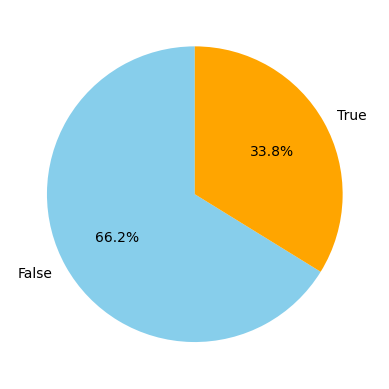

In [94]:
import matplotlib.pyplot as plt

# Crear una nueva columna basada en las condiciones (si es necesaria)
df_new['ambas'] = (df_new['Vulgar'] == 1)  | (df_new['Ofensivo'] == 1)

# Contar las ocurrencias de True/False en la columna 'huevo'
conteo_ambas = df_new['ambas'].value_counts()

# Crear el gráfico de pastel
plt.pie(conteo_ambas, labels=conteo_ambas.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.show()


In [96]:
conteo_ambas = df_new['ambas'].value_counts()
conteo_ambas

ambas
False    3131
True     1598
Name: count, dtype: int64